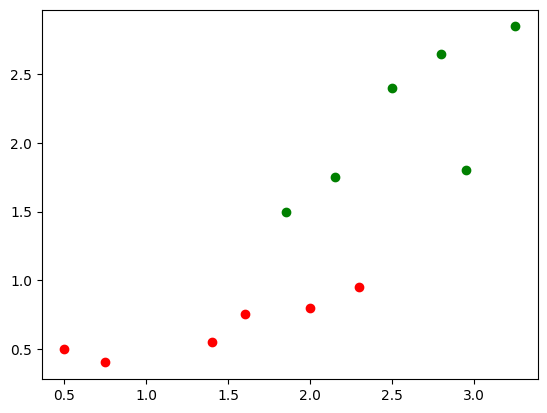

In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
x1=[0.5, 0.75, 1.4, 1.6, 2, 2.3]
y1=[0.5, 0.4, 0.55, 0.75, 0.8, 0.95]
x2=[1.85, 2.15, 2.5, 2.8, 2.95, 3.25]
y2=[1.5, 1.75, 2.4, 2.65, 1.8, 2.85]
plt.plot(x1, y1, 'ro', label='line 1')
plt.plot(x2, y2, 'go', label='line 2')

0.49333333333333335
0.15833333333333333


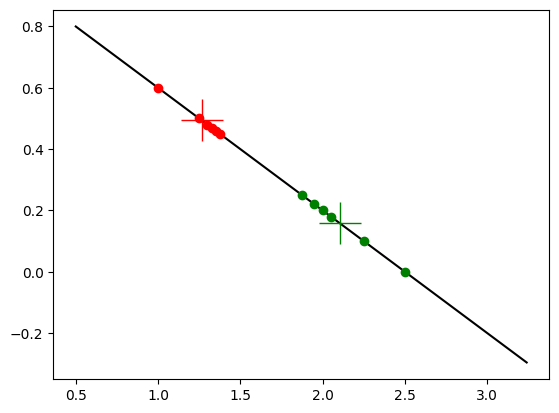

In [144]:
# Create the vectors X and Y
x = np.arange(0.5, 3.25, 0.01, dtype=np.double)
y = -0.4*x+1

# Create the plot
plt.plot(x,y, 'k', label='line 0')


y1_r=[0.6, 0.5, 0.48, 0.47, 0.46, 0.45]
y2_r=[0.2, 0.25, 0.22, 0.1, 0.18, 0]

my1=np.mean(y1_r)
my2=np.mean(y2_r)
print(my1)
print(my2)

x1=[]
for y in y1_r:
    x1.append((-y+1)/(0.4))
x2=[]
for y in y2_r:
    x2.append((-y+1)/(0.4))
plt.plot(x1, y1_r, 'ro', label='line 2')
plt.plot(x2, y2_r, 'go', label='line 1')
plt.plot((-my1+1)/(0.4), my1, 'r+', markersize=30)
plt.plot((-my2+1)/(0.4), my2, 'g+', markersize=30)



[0.5  0.75 1.4  1.6  2.   2.3  1.85 2.15 2.5  2.8  2.95 3.25]
[0.5  0.4  0.55 0.75 0.8  0.95 1.5  1.75 2.4  2.65 1.8  2.85]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
Preserving 100.0% of variance
[[ 0.169613   -0.79147837]
 [-0.98551075  0.61119718]]
0.16961300343433633
-0.7914783660376133


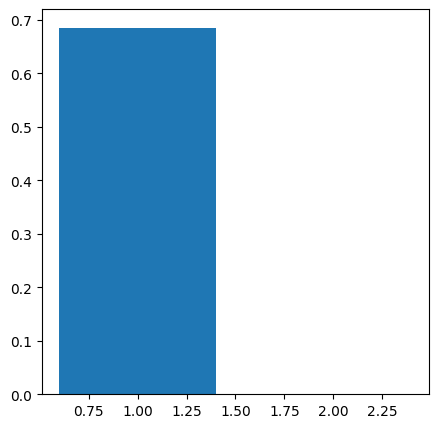

In [145]:

from lda import LDA_reducer as reducer
import matplotlib.pyplot as plt
import pandas as pd


x1=[0.5, 0.75, 1.4, 1.6, 2, 2.3]
y1=[0.5, 0.4, 0.55, 0.75, 0.8, 0.95]
x2=[1.85, 2.15, 2.5, 2.8, 2.95, 3.25]
y2=[1.5, 1.75, 2.4, 2.65, 1.8, 2.85]


x_12=np.concatenate((x1, x2), axis=0)
print(x_12)

y_12=np.concatenate((y1, y2), axis=0)
print(y_12)
i=0
T=[]
while(i<len(x_12)):
    if(i<len(x_12)/2):
        T.append(0)
    else:
        T.append(1)
    i=i+1
print(T)

data=pd.DataFrame({1:x_12,2:y_12, "target":T})
lda = reducer(data, 1, "target")
print(lda.eig_vec)
print(lda.eig_vec[0][0])
print(lda.eig_vec[0][1])


(-0.1625, 3.4125, -5.973139151124159, 3.2701494833868647)

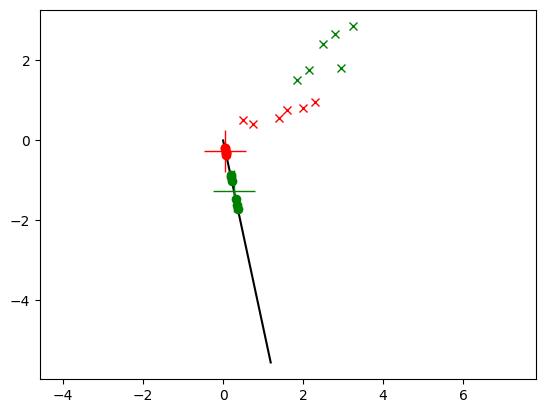

In [146]:
from numpy import append


slope=lda.eig_vec[0][1]/lda.eig_vec[0][0]

##################################################
##################################################
##################################################

x = np.arange(0, 1.2, 0.01, dtype=np.double)
y = slope*x
plt.plot(x,y, 'k', label='line 0')
a = np.array([lda.eig_vec[0][0], lda.eig_vec[0][1]])

#################################################
# Draw each point:
i=0
x_p=[] #optional
y_p=[]
while(len(x_12)>i):
    b = np.array([[x_12[i]], [y_12[i]]])
    y_p.append(a.dot(b))
    if(i<len(x_12)/2):
        x_p.append(y_p[i]/slope) #optional
        plt.plot(x_p[i], y_p[i], 'ro', label='line 1')
    else:
        x_p.append(y_p[i]/slope) #optional
        plt.plot(x_p[i], y_p[i], 'go', label='line 2')
    i=i+1

plt.plot(x1, y1, 'rx', label='line 3')
plt.plot(x2, y2, 'gx', label='line 4')

n=int(len(x_12)/2)
y1_mean=np.mean(y_p[0:n-1])
y2_mean=np.mean(y_p[n:])
plt.plot(y1_mean/slope, y1_mean, 'r+', markersize=30)
plt.plot(y2_mean/slope, y2_mean, 'g+', markersize=30)

plt.axis('equal')


In [147]:
## Creating Random Points.....
#x1_n=np.random.normal(1.425, 0.8, size=(1, 6))
x1_n=np.random.multivariate_normal([1.425, 2.5833], [[0.8, 1], [0.5, 0.7]], size=(1, 6))
print(x1_n)
#x2_n=np.random.normal(2.5833, 0.8, size=(1, 6))
#print(x2_n)
#y1_n=np.random.normal(0.6583, 0.8, size=(1, 6))
#print(y1_n)
#y2_n=np.random.normal(2.1583, 0.8, size=(1, 6))
#print(y2_n)
#plt.plot(x1_n, y1_n, 'ro', label='line 2')
#plt.plot(x2_n, y2_n, 'go', label='line 1')
x1_n_t=np.transpose(x1_n)
print(x1_n_t)


[[[0.58389627 1.5213717 ]
  [0.79345511 1.76375782]
  [0.58390224 1.70183873]
  [1.82493504 2.4396636 ]
  [1.58729704 2.81772146]
  [2.23290289 3.18918446]]]
[[[0.58389627]
  [0.79345511]
  [0.58390224]
  [1.82493504]
  [1.58729704]
  [2.23290289]]

 [[1.5213717 ]
  [1.76375782]
  [1.70183873]
  [2.4396636 ]
  [2.81772146]
  [3.18918446]]]


/var/folders/xb/y453254j5qj_s_5vyyq_kgtm0000gn/T/ipykernel_2519/3171006130.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  x1_n=np.random.multivariate_normal([1.425, 2.5833], [[0.8, 1], [0.5, 0.7]], size=(1, 6))
